##**<font color="Green">Jamboree Education : Linear Regression</font>**

**Indroduction**:
Jamboreeis a renowned educational institution that has successfully assisted numerous students in gaining admission to top colleges abroad. With their proven
problem-solving methods, they have helped students achieve exceptional scores on exams like GMAT, GRE, and SAT with minimal effort.

**Purpose of the Buisness Case study:**
The purpose of this case study is to help Jamboree enhance its new feature for assessing Ivy League admission chances for Indian applicants. By analyzing key factors affecting admissions, we aim to provide predictive insights and identify important interrelationships between variables.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://drive.google.com/file/d/1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4/view

--2025-02-18 07:10:48--  https://drive.google.com/file/d/1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4/view
Resolving drive.google.com (drive.google.com)... 108.177.125.101, 108.177.125.100, 108.177.125.113, ...
Connecting to drive.google.com (drive.google.com)|108.177.125.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view.1’

view.1                  [ <=>                ]  33.26K  --.-KB/s    in 0.006s  

2025-02-18 07:10:50 (5.60 MB/s) - ‘view.1’ saved [34061]



In [ ]:
df=pd.read_csv("/content/Jamboree.csv")

**<font color='red'>Data Exploration:</font>**

In [ ]:
df.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
316,317,298,101,2,1.5,2.0,7.86,0,0.54
158,159,306,106,2,2.0,2.5,8.14,0,0.61
102,103,314,106,2,4.0,3.5,8.25,0,0.62
204,205,298,105,3,3.5,4.0,8.54,0,0.69
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [ ]:
df.shape

(500, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


This dataset contains 500 rows and 9 columns. The columns include academic details of students, such as GRE Score, TOEFL Score, CGPA, SOP, LOR, Research, University Rating, and Chance of Admit.

In [ ]:
df.isna().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
df.duplicated().sum()

0

The dataset does not contain any missing or duplicate values.

In [ ]:
df.nunique()

,0
Serial No.,500
GRE Score,49
TOEFL Score,29
University Rating,5
SOP,9
LOR,9
CGPA,184
Research,2
Chance of Admit,61


**<font color='red'>Non-graphical and graphical analysis</font>**

In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**Statistics of the data:**

The GRE Score has a mean value of 316.47, with a minimum value of 290.00 and a maximum value of 340.00. The standard deviation is 11.29.

The TOEFL Score has a mean value of 107.19, with a minimum value of 92.00 and a maximum value of 120.00. The standard deviation is 6.08.

The University Rating is on a scale from 1 to 5.

The SOP (Statement of Purpose) scores range from 1 to 5, with 5 being the highest and 1 being the lowest. The mean SOP value is 3.37.

The LOR (Letter of Recommendation) scores range from 1 to 5, with 5 being the highest and 1 being the lowest. The mean LOR value is 3.48.

The CGPA has a mean value of 8.57, a minimum value of 6.80, and a maximum value of 9.92. The standard deviation is 0.60.

The Research variable is binary: if a student has published research, the value is 1; otherwise, it is 0.

The Chance of Admit has a mean value of 0.72, meaning the average chance of admission is 72%. The minimum value is 0.34 and the maximum value is 0.97.

In [ ]:
# Remove blank space from column name if any
df.columns=df.columns.str.strip()

In [ ]:
df.drop("Serial No.", inplace=True, axis=1)

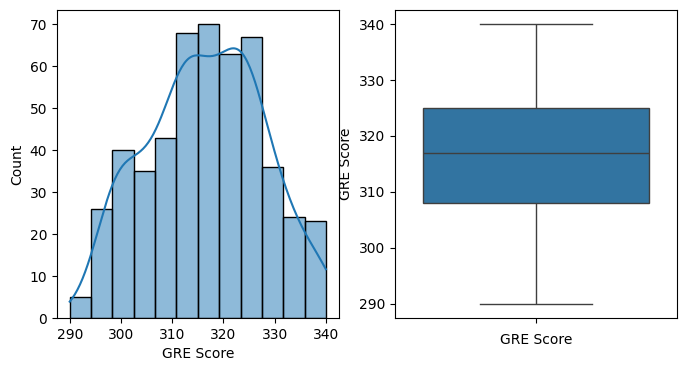

In [ ]:
# Checking the distribution of GRE Score and outliers
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(df["GRE Score"],kde=True)
plt.xlabel("GRE Score")

plt.subplot(1,2,2)
sns.boxplot(df["GRE Score"])
plt.xlabel("GRE Score")
plt.show()


<Axes: ylabel='TOEFL Score'>

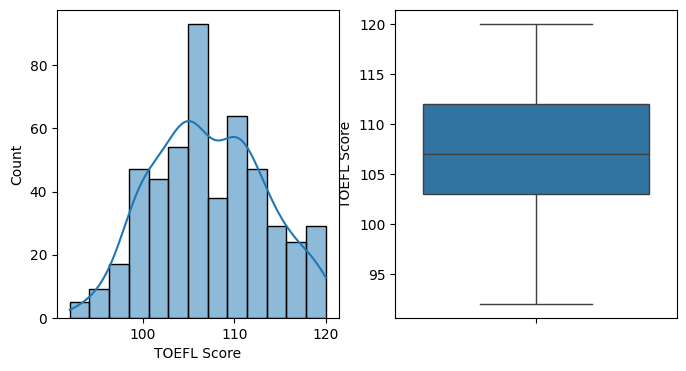

In [ ]:
# Checking the distribution of TOEFL Score and Outliers

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)

sns.histplot(df["TOEFL Score"], kde=True)
plt.subplot(1,2,2)
sns.boxplot(df["TOEFL Score"])

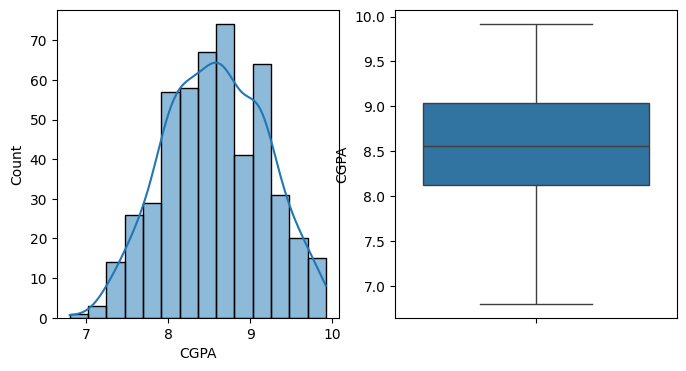

In [ ]:
# The distribution of
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(df["CGPA"],kde=True)
plt.subplot(1,2,2)
sns.boxplot(df["CGPA"])
plt.show()

We can see from the plot that the values of GRE Score, TOEFL Score, and CGPA are approximately normally distributed and do not have outliers.


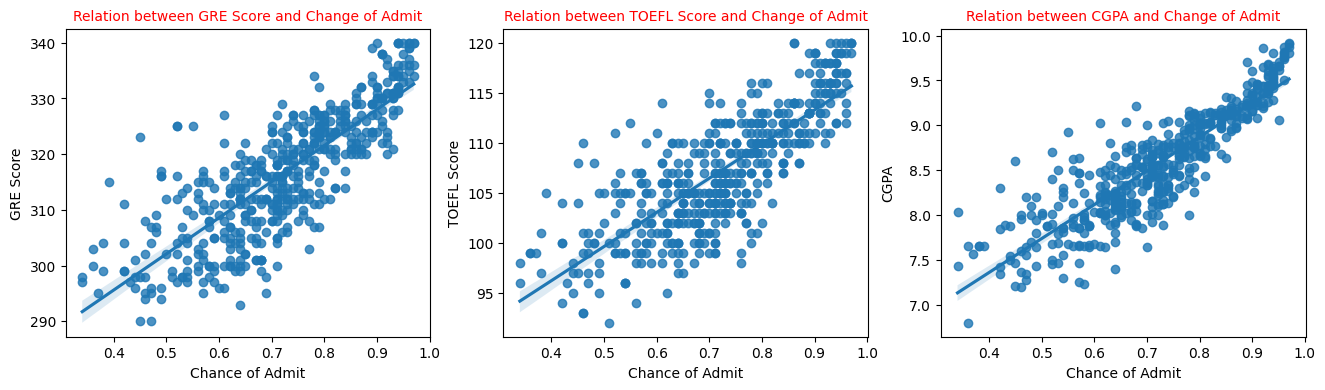

In [ ]:
# Plot to explore the relationship between GRE Score and Chance of Admit, ToEFL Score and Change of Admit and CGPA and Change of Admit

plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.regplot(data=df, x=df["Chance of Admit"], y=df["GRE Score"])
plt.title("Relation between GRE Score and Change of Admit",color='red', fontsize=10)

plt.subplot(1,3,2)
sns.regplot(data=df, x=df["Chance of Admit"], y=df["TOEFL Score"])
plt.title("Relation between TOEFL Score and Change of Admit",color='red', fontsize=10)

plt.subplot(1,3,3)
sns.regplot(data=df, x=df["Chance of Admit"], y=df["CGPA"])
plt.title("Relation between CGPA and Change of Admit",color='red', fontsize=10)
plt.show()

The plot shows that the Chance of Admit is positively correlated with the GRE Score, TOEFL Score, and CGPA. It is evident that as the GRE Score, TOEFL Score, and CGPA increase, the Chance of Admit also increases. We can observe a linear relationship among the variables.

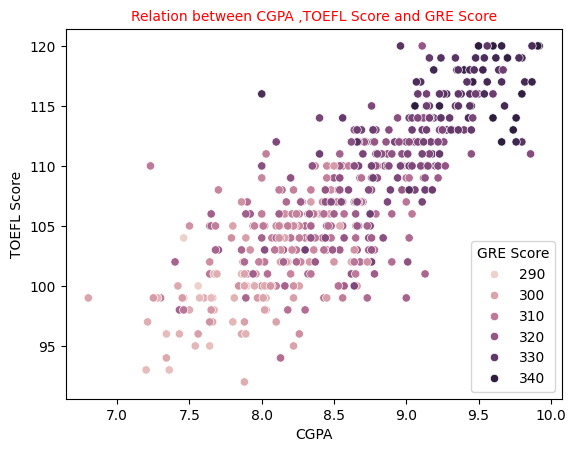

In [ ]:
# The Relationship between CGPA, TOEFL Score  and GRE Score
sns.scatterplot(data=df, x=df["CGPA"], y=df["TOEFL Score"], hue=df["GRE Score"])
plt.title("Relation between CGPA ,TOEFL Score and GRE Score",color='red', fontsize=10)
plt.show()

The plot shows that there is a higher chance that if a student has a high CGPA, they will also have a higher TOEFL Score, and subsequently, a higher GRE Score.

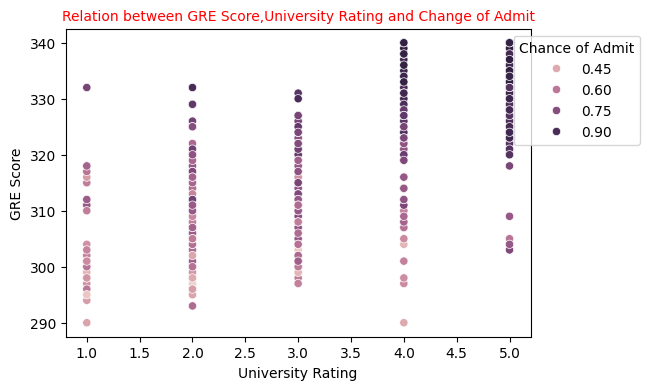

In [ ]:
# The relationship between GRE Score, University Ranking and Chance of Admit
plt.figure(figsize=(6,4))

sns.scatterplot(data=df, x=df["University Rating"], y=df["GRE Score"],hue=df["Chance of Admit"])
plt.title("Relation between GRE Score,University Rating and Change of Admit",color='red', fontsize=10)
plt.legend(title="Chance of Admit",loc="upper right", bbox_to_anchor=(1.25,1))
plt.show()


The plot shows that the Chance of Admit for higher-ranking universities increases with a higher GRE Score. We observe that for students selecting universities with rankings 4 or 5, the chance of admit increases from 75% to 90% for those with a GRE Score greater than 330.

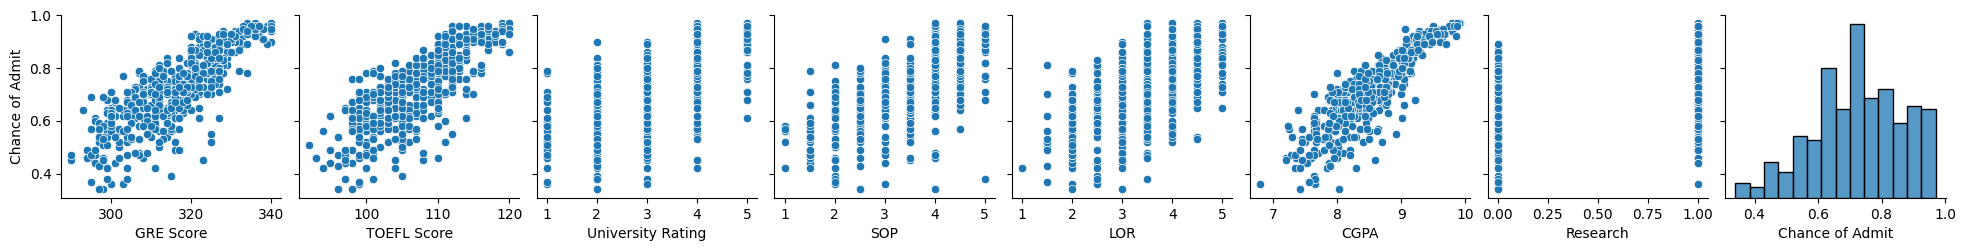

In [ ]:
sns.pairplot(df, y_vars="Chance of Admit")
plt.show()



*   We can observe that a higher score in SOP and LOR is associated with a higher chance of admit.
*    Students with a Research Value of 1 have a higher chance of admit than students with a Research Value of 0.



<Axes: >

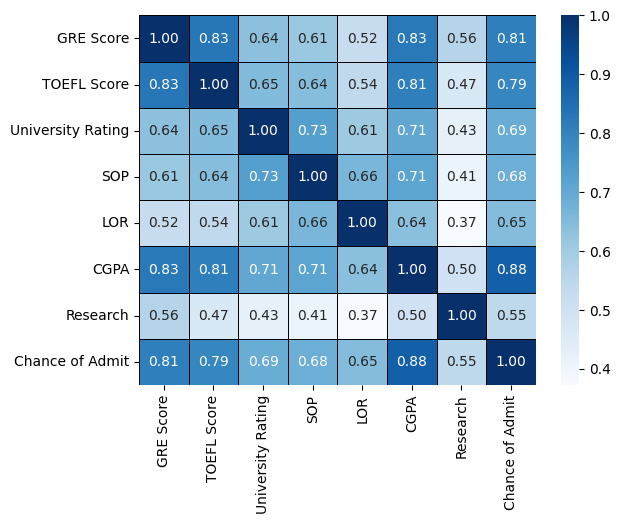

In [ ]:
# Data Correlation
corr_values=df.corr()
sns.heatmap(corr_values, annot=True, fmt='.2f', cmap='Blues',linewidths=0.5, linecolor='black')

The graph shows that the features CGPA and GRE Score are the most correlated with the Chance of Admit, with correlation values of 0.88 and 0.81, respectively. Research has a minimal correlation value of 0.55.
All the features are positively correlated with each other.

**<font color="red"> Data Modeling </font>**




In [ ]:
# Separation of the target variable from the data
y=df["Chance of Admit"]

In [ ]:
x=df.drop("Chance of Admit", axis=1)

In [ ]:
x.shape, y.shape

((500, 7), (500,))

* Separated the data into independent and dependent variables.
* The independent dataset has 500 rows and 7 columns, while the dependent dataset has 500 rows and 1 column.

In [ ]:
# Data Split into train and test data set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
x_train.shape, x_test.shape

((400, 7), (100, 7))

Again, the dataset was divided into training and test datasets.

In [ ]:
x_train.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

In [ ]:
# Data standardization.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train=pd.DataFrame(scaler.fit_transform(x_train), columns=x.columns)

In [ ]:
X_train.sample()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
27,0.781478,0.815485,0.775263,0.648005,0.564616,0.716658,0.886405


Initially, the columns of the dataset had different scales, so StandardScaler was used to bring the values into the same scale.

Since the variables have a linear relationship, I am using OLS to train the model



In [ ]:
import statsmodels.api as sm

In [ ]:
y_train.shape

(400,)

In [ ]:
x_sm=sm.add_constant(X_train)

model1 = sm.OLS(np.array(y_train), x_sm)
sm_model1=model1.fit()

In [ ]:
print(sm_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     272.1
Date:                Tue, 18 Feb 2025   Prob (F-statistic):          3.33e-146
Time:                        07:10:55   Log-Likelihood:                 573.41
No. Observations:                 400   AIC:                            -1131.
Df Residuals:                     392   BIC:                            -1099.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7221      0.00

In [ ]:
# Fetures and it's coffecients
for x,y in zip(X_train.columns, sm_model1.params):
   print(f" {x} : {y}")

 GRE Score : 0.7221250000000002
 TOEFL Score : 0.023376268542255562
 University Rating : 0.017766601978284398
 SOP : 0.0055590801823312535
 LOR : 0.002049455767818547
 CGPA : 0.01692450726981708
 Research : 0.06765792208709437


In [ ]:
R_square=sm_model1.rsquared
print("R_square score:",R_square)

R_square score: 0.829322723369172


In [ ]:
Adj_R_square=sm_model1.rsquared_adj
print("Adj R_square score:",Adj_R_square)

Adj R_square score: 0.8262749148579073


In [ ]:
#H0: Columns are irrelavant
#H1: Columns are not irrelavant
# here we can see P_value of column Uiversity Rating And SOP is greater than 0.5 hence We can not reject H0
# droping the column SOP
X_train_new= X_train.drop("SOP", axis=1)

The OLS summary shows that the p-value of the feature SOP is 0.669, which is higher than 0.05, and the p-value of University Rating is 0.237, which is also greater than 0.05. Hence, we will drop the feature SOP.

In [ ]:
X_train_new.sample()

,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research
166,-0.222758,-0.679294,-0.9669,-0.534394,-0.606996,-1.128152


In [ ]:
x_sm=sm.add_constant(X_train_new)
model2=sm.OLS(np.array(y_train), x_sm )
sm_model2=model2.fit()
print(sm_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     318.1
Date:                Tue, 18 Feb 2025   Prob (F-statistic):          1.96e-147
Time:                        07:10:55   Log-Likelihood:                 573.32
No. Observations:                 400   AIC:                            -1133.
Df Residuals:                     393   BIC:                            -1105.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7221      0.00

After dropping the SOP feature, I trained the OLS model again. This time, the p-value of University Rating decreased but is still greater than 0.05, indicating that this feature is irrelevant. However, I will keep this feature because the Chance of Admit has a positive correlation with University Ranking.

**<font color="red">The assumptions of linear regression.</font>**

**Non Multicollnearity:**

In [ ]:
# Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["feature"]=X_train_new.columns
vif["VIF"]=[variance_inflation_factor(X_train.values, i) for i in range(X_train_new.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,feature,VIF
5,Research,4.77
0,GRE Score,4.24
1,TOEFL Score,4.06
3,LOR,2.71
2,University Rating,2.59
4,CGPA,1.98


\Here we can se that vif value of the feature is less than 5 hence Multicollinearity is not present.

In [ ]:
# Test data preparation and transformation.
X_test=pd.DataFrame(scaler.transform(x_test), columns=X_train.columns)

In [ ]:
X_test.sample()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
63,2.150891,0.815485,0.775263,1.670499,1.114121,1.822495,0.886405


In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
X_test_new=X_test.drop(columns=['SOP'])

Since the SOP feature has been dropped from the training dataset, it will also be dropped from the test dataset.

In [ ]:
# Predicting the values for the test data.
y_pred=sm_model2.predict(X_test_new)

**Normality of residual:**

In [ ]:
residuals=y_test.values-y_pred

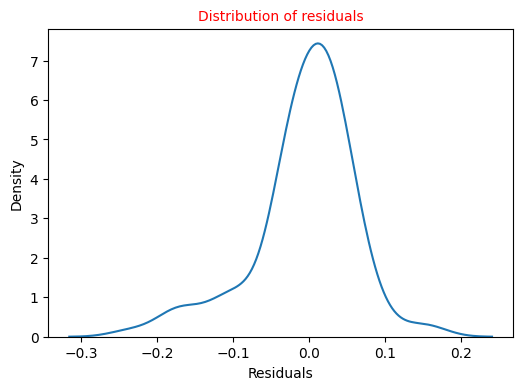

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(residuals)
plt.xlabel("Residuals")
plt.title("Distribution of residuals",color='red', fontsize=10)
plt.show()

In [ ]:
# H0: data is normaly distributed
# H1: Data is not normaly distributed
from scipy import stats
res=stats.shapiro(residuals)
res.statistic

0.9206106494782433

Here we can see the value is closer to 1. it denots that data folollows the gaussian distribution, hence we can say that residuals are normaly distributed

**Mean of residual:**

In [ ]:
mean_residuals=np.mean(residuals)
mean_residuals

-0.00606745897056153

The Mean of residual is closer to zero

<Axes: >

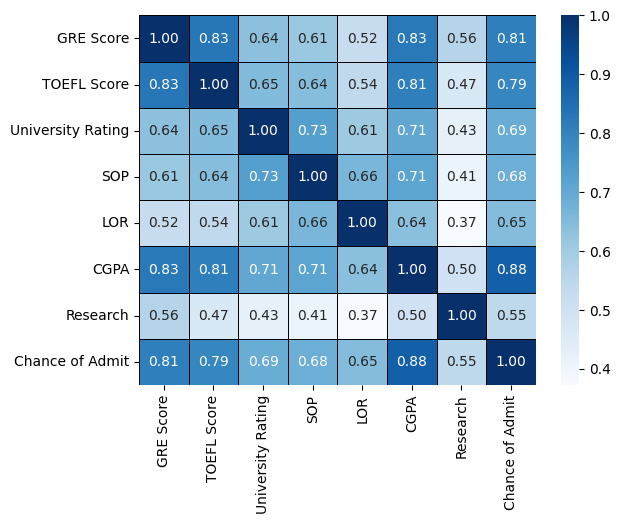

In [ ]:
# Linear relationship between Independent and dependent features
corr_values=df.corr(method='pearson')
sns.heatmap(corr_values, annot=True, fmt='.2f', cmap='Blues',linewidths=0.5, linecolor='black')

**Test of Homoscedasticity:**

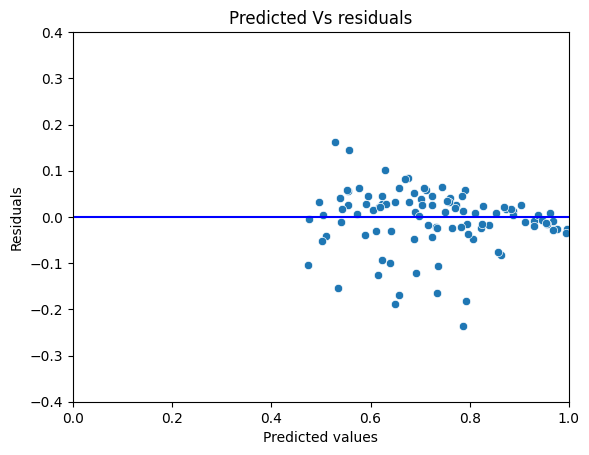

In [ ]:
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
p = sns.lineplot(x=[0,26], y=[0,0], color='blue')
p = plt.title('Predicted Vs residuals')

We can see that the residuals of the predicted values are mostly linear, which means they have similar variance, with some outliers showing larger variance. This indicates that the model follows homoscedasticity.

In [ ]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity:
# H0: Residuals are homoscedastic
# H1: Residuals are not homoscedastic
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name=['F statistic', 'p_val']
test= sms.het_goldfeldquandt(residuals, X_test_new)
lzip(name, test)

[('F statistic', 1.6362150862123406), ('p_val', 0.05512334282949605)]

p_val>0.05 hence we fail to reject the null hypothesis. it shows that residuals are homoscedastic.

**<font color="red">Evaluate the model’s performance</font>**

In [ ]:
# Calculation of R2-Square, Adj R_square, MAE, MSE and RMSE
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

print('R2-Square:', r2_score(y_test.values,y_pred))
print("Adj R_Square", 1 - (1-r2_score(y_test.values,y_pred))*(len(y_test)-1)/(len(y_test)-X_test_new.shape[1]-1))
print('Mean Absolute Error:', mean_absolute_error(y_test.values,y_pred))
print('Mean Squared Error:', mean_squared_error(y_test.values,y_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test.values,y_pred)))


R2-Square: 0.7928592146031247
Adj R_Square 0.7770985026707538
Mean Absolute Error: 0.04720994220152355
Mean Squared Error: 0.004427004579870602
Root Mean Square Error: 0.06653573911718876


**<font color="red">Observation & Insights:</font>**

* The R-squared score of 0.79285 is close to 1, indicating that the model performs well, as the sum of squared residuals (SS_res) is lower than the total sum of squares (SS_total). However, there is still room for improvement.
* The adjusted R-squared value is lower than the R-squared score, suggesting that the model contains unnecessary features, and the adjusted R-squared penalizes these irrelevant features. This could also be due to the small dataset, as a larger dataset would provide a more reliable adjusted R-squared score.
* The Mean Absolute Error (MAE) is 0.0472, and the Mean Squared Error (MSE) is 0.004, both very close to zero, indicating a very small difference between the predicted and actual values.




**Using other Linear Regression Techniques:**

In [ ]:
# Using lasso and Ridge to improve r2_score
from sklearn.linear_model import Ridge, Lasso
lasso_model=Lasso(alpha=0.01)
ridge_model=Ridge(alpha=0.01)

In [ ]:
X_test_new=X_test_new.drop(columns=['const'])

In [ ]:
lasso_model.fit(X_train_new, y_train)
ridge_model.fit(X_train_new, y_train)

Ridge(alpha=0.01)

In [ ]:
# R2 score of train data
lasso_train_r2=lasso_model.score(X_train_new, y_train)
ridge_train_r2=ridge_model.score(X_train_new, y_train)

print("R2 score of Lasso train data:", lasso_train_r2)
print("R2 score of Ridge train data:", ridge_train_r2)

R2 score of Lasso train data: 0.8208493416470735
R2 score of Ridge train data: 0.8292431332957741


In [ ]:
# Y value prediction
lasso_pred=lasso_model.predict(X_test_new)
ridge_pred=ridge_model.predict(X_test_new)

In [ ]:
print("MSE of Lasso:", mean_squared_error(y_test, lasso_pred))
print("MSE of Ridge:", mean_squared_error(y_test, ridge_pred))

MSE of Lasso: 0.004393395399202126
MSE of Ridge: 0.004427025981983681


In [ ]:
# R2_score of test data
lasso_r2=r2_score(y_test, lasso_pred)
ridge_r2=r2_score(y_test, ridge_pred)
print("R2 score of Lasso test data:", lasso_r2)
print("R2 score of Ridge test data:", ridge_r2)

R2 score of Lasso test data: 0.7944317975888909
R2 score of Ridge test data: 0.7928582131922537


**<font color="red">Conclusion:</font>**

The R2 score of 0.792 indicates that the model explains 79% of the variance, suggesting a good fit. The low Mean Squared Error (MSE) and Mean Absolute Error (MAE), both close to zero, demonstrate that the model's predictions are very close to the actual values.

All three regression models(OLS,Lasso and Ridge) produced consistent results, showing that they capture similar data patterns without overfitting or underfitting.

To further improve the model, removing outliers and increasing the dataset size could enhance the R2 score, as a larger dataset would capture data patterns more efficiently, improving the model's reliability and adjusted R2 score, making the model more robust and accurate.
